In [58]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is a skin to matplotlib...theyre highly ontgrated
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram , linkage # dendogram is tree like hierarchical representaio  of points, 
# linkage to specific clustering method we employ
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle #turns python objects into strings

# DATA EXPLORATION

In [2]:
df_segmentation = pd.read_csv("segmentation data.csv" , index_col=0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
#pearson correlation (by default in python) 
# correlation is lnear dependency of two variables
df_segmentation.corr()

# hard to understand the pattern cz these are numbers only...we prefer visualizaitons---> heat map

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


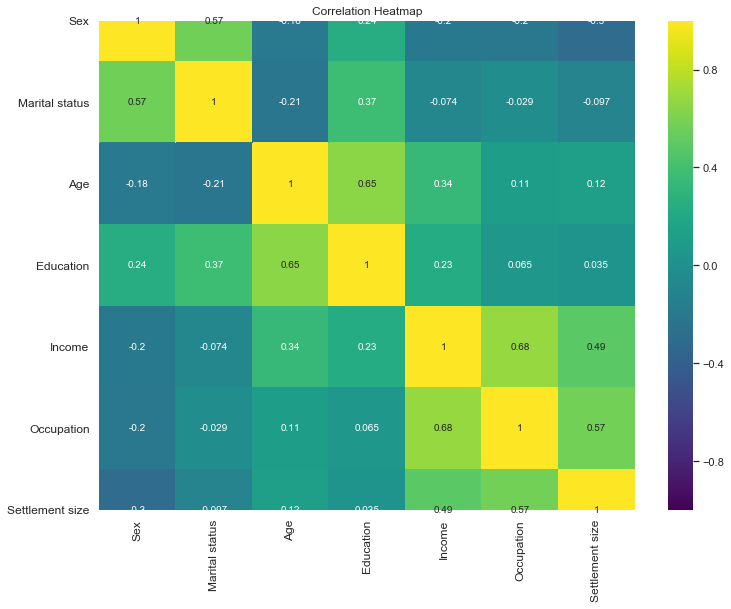

In [6]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'viridis',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels() , rotation =0, fontsize=12)
s.set_xticklabels(s.get_xticklabels() , rotation =90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()
# explroign corr between features of consumers is the 1st step to identifying consumers and putting them in silimar groups

Text(0.5, 1.0, 'Visualization of raw data')

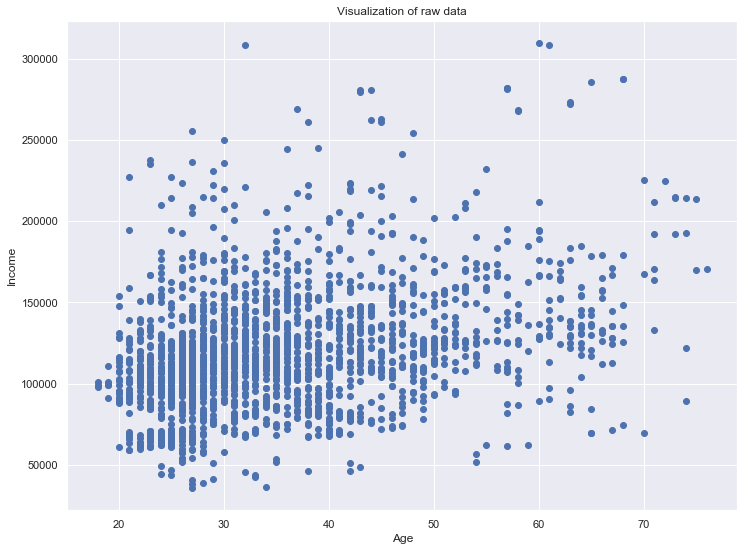

In [7]:
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

# DATA PREPROCESSING

In [8]:
# #why standardiztion?
# our segmentation models will be based on similarites and differnences of indv consumers on features that charactereize them.

# for example: my age is 22 and salary is 20,000 so my model will give importance to 20k bcz it has no context yet. we want
# to treat all featurs similarly.

In [59]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

# Hierarchical Clustering: Background

In [10]:
# types: Divisive (top down) and Agglomarative (bottom up)
#     Animal kingdom example
#     agglo is eaasier mathematically
hie_clus = linkage(segmentation_std, method = "ward") # this performs hier custering on our data and return result as linkage matrix


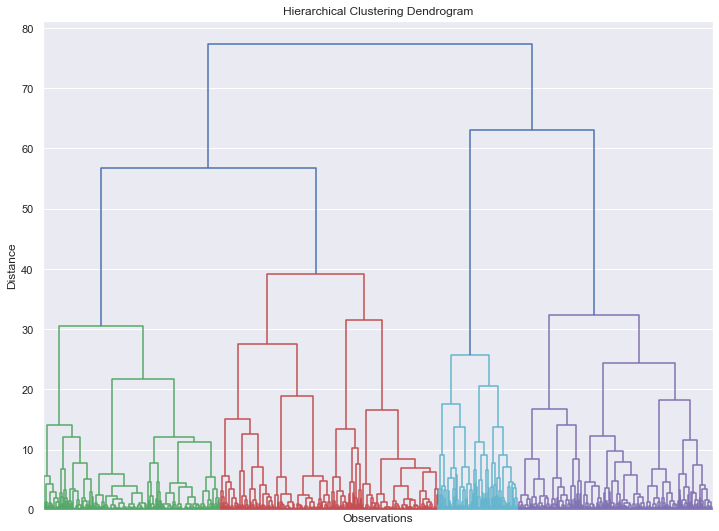

In [11]:
plt.figure(figsize= (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hie_clus,
          show_leaf_counts = False,
          no_labels = True)
#           color_threshold = 0)
plt.show()

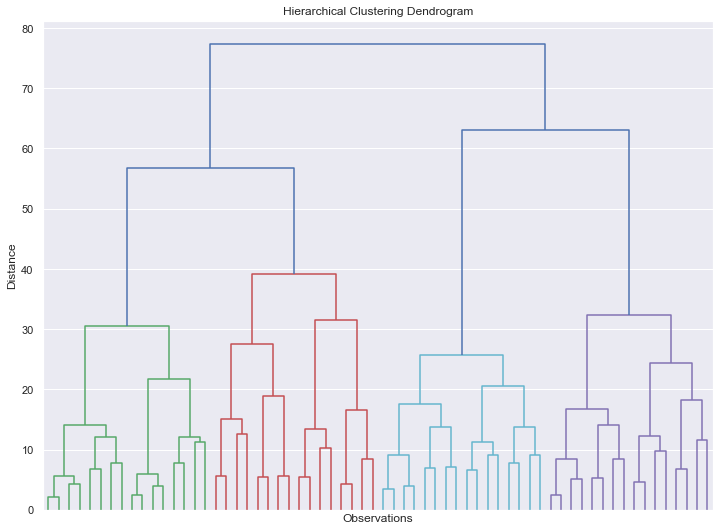

In [12]:
plt.figure(figsize= (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hie_clus,
           truncate_mode = 'level', 
           p = 5,
          show_leaf_counts = False,
          no_labels = True)
#           color_threshold = 0)
plt.show()

# K-MEANS CLUSTERING APPLICATION

In [13]:
# Doesnt tell num of clusters just tell eucl norm. assume num of clu by urself4
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=13)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

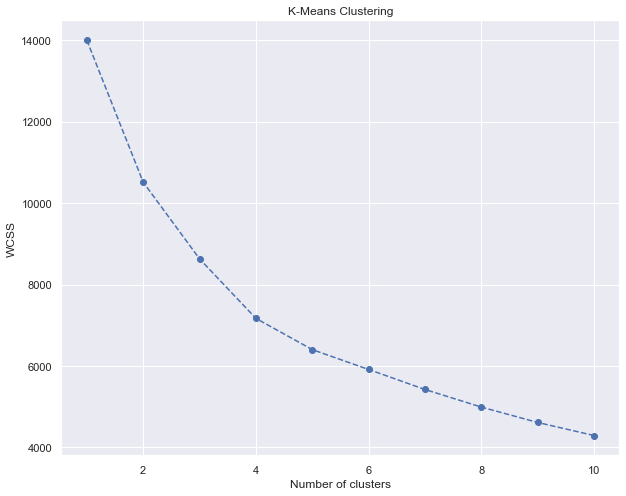

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o' , linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [15]:
# depeding on th shapre of this graph we make decisoin about number of clusters...we wil use elbow method
# the elbow is at the 4th clus and we saw in hie rar clu we werre having 4 clus
# incase of more clusters, aloop with nore than 10 iterations should be performsed
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=13)


In [16]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=13, tol=0.0001, verbose=0)

# RESULTS

In [17]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_ #adding predictions using labels_ attr

In [18]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [19]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [20]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
fewer-opportunities,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [21]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

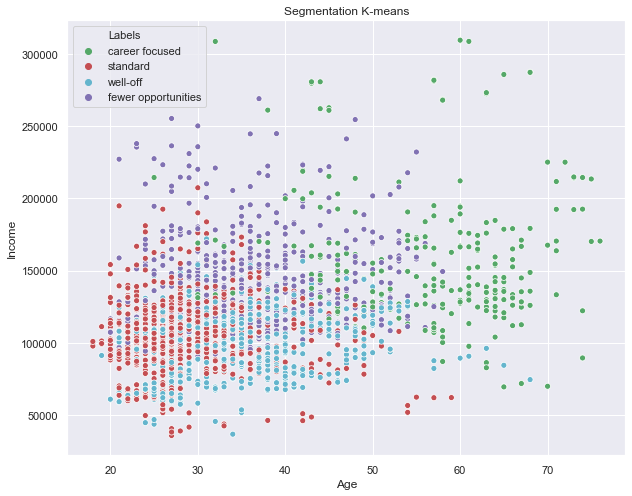

In [22]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [25]:
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
erc= pca.explained_variance_ratio_

Text(0, 0.5, 'Cummalative Explained Variance')

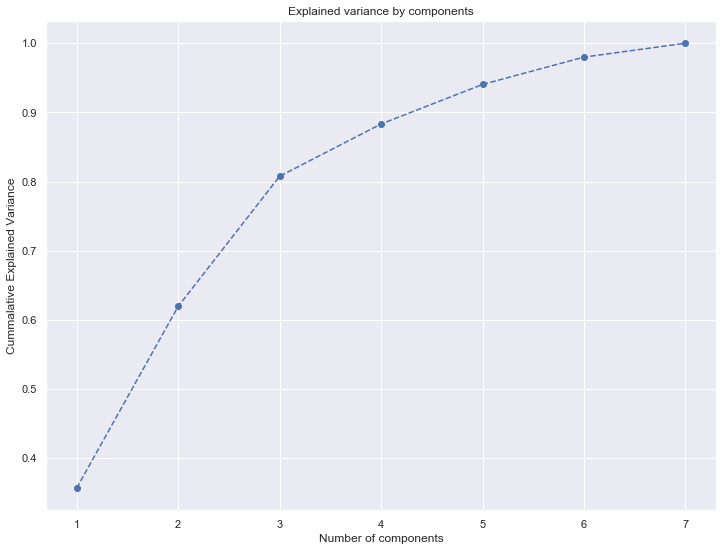

In [32]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), erc.cumsum() , marker = 'o' , linestyle= '--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cummalative Explained Variance")

#  choose 70 to 80% of the variance point from this graph

In [34]:
pca = PCA(n_components = 4)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA RESULTS


In [35]:
pca.components_
#hard to make insights...put in DF

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [37]:
#here, data comes from components and cols from orig col values from seg_df
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3' , 'Component 4'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


([<matplotlib.axis.YTick at 0x1ae62a5d080>,
 <a list of 4 Text yticklabel objects>)

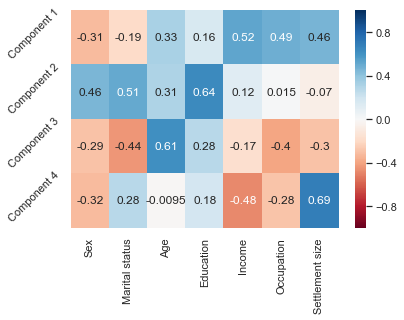

In [44]:
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = "RdBu",
           annot =  True) #DataFrames will match on position, not index.
plt.yticks([0,1,2,3,4],
           ["Component 1" , "Component 2" , "Component 3" , "Component 4"],
           rotation = 45)
            

In [46]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]])

In [47]:
scores_pca = pca.transform(segmentation_std)

# 𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀

In [48]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

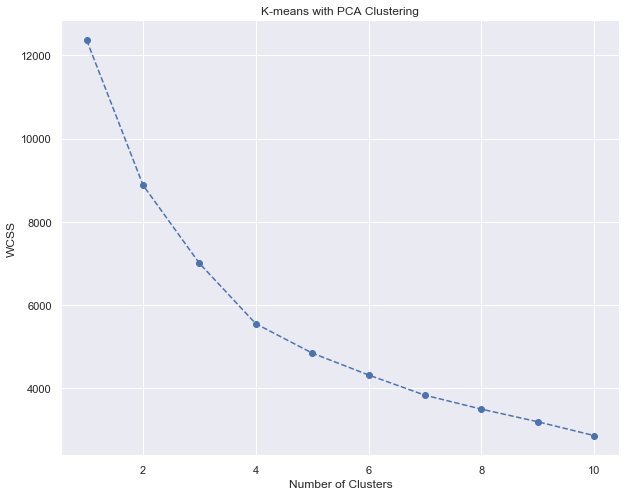

In [49]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [50]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [51]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# 𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [63]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3' , 'Component 4'] #labelling the cols i think
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [64]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,-0.945916,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,-0.736766,3
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,-0.131774,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,-0.042606,3


In [65]:
# We calculate the means by segments. to gain sum insights
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869
1,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736
2,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684
3,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662


In [66]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'well-off', 
                                                          1:'career focused',
                                                          2:'fewer opputunities', 
                                                          3:'standard'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,0.093869,264,0.1320
career focused,0.026178,0.178010,35.624782,0.734729,140950.319372,1.267016,1.520070,1.381089,-1.044848,-0.273292,0.211736,573,0.2865
fewer opputunities,0.319018,0.089980,35.259714,0.768916,95850.155419,0.296524,0.038855,-0.987777,-0.882022,0.965476,-0.271684,489,0.2445
standard,0.905045,0.986647,28.873887,1.063798,107576.228487,0.672107,0.439169,-1.122432,0.733291,-0.797918,-0.019662,674,0.3370


In [67]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'well-off', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'standard'})

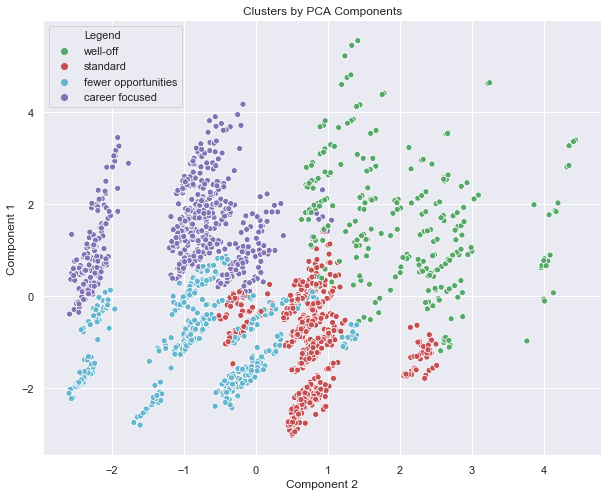

In [76]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

# DATA EXPORT

In [79]:
#first we need scaler to preprocess data
pickle.dump(scaler, open('scaler.pickle' ,'wb'))
#also need PCA and kmeans_PCA
pickle.dump(pca, open('pca.pickle' , 'wb'))
pickle.dump(kmeans_pca, open('kmeans_pca.pickle' , 'wb'))
